In [4]:
import cv2
import numpy as np

def binarizar_imagen(ruta_imagen, umbral=128):
    # Cargar la imagen en escala de grises
    imagen_gris = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    
    # Aplicar la binarización utilizando el umbral
    _, imagen_binarizada = cv2.threshold(imagen_gris, umbral, 255, cv2.THRESH_BINARY)
    
    return imagen_binarizada



# Guardar la imagen binarizada
cv2.imwrite("imagen_binarizada.jpg", imagen_binarizada)


True

### Uso de Funcion

In [8]:
ruta_imagen = r"C:\Users\Mack\Documents\Archivos JP\Master\Q32024\TExtM\Pancho.jpg"
imagen_binarizada = binarizar_imagen(ruta_imagen, umbral=128)
imagen_bin= cv2.imread("imagen_binarizada.jpg")

In [ ]:
imagen_bin

# Problema #2

In [11]:
def procesar_imagenes(ruta_imagen1, ruta_imagen2, umbral=128):
    # Cargar las imágenes en color
    imagen1 = cv2.imread(ruta_imagen1)
    imagen2 = cv2.imread(ruta_imagen2)
        
    # Suma y resta de imágenes a color
    suma = cv2.add(imagen1, imagen2)
    resta = cv2.subtract(imagen1, imagen2)
    
    # Convertir las imágenes a escala de grises
    gris1 = cv2.cvtColor(imagen1, cv2.COLOR_BGR2GRAY)
    gris2 = cv2.cvtColor(imagen2, cv2.COLOR_BGR2GRAY)
    
    # Binarizar las imágenes
    _, binaria1 = cv2.threshold(gris1, umbral, 255, cv2.THRESH_BINARY)
    _, binaria2 = cv2.threshold(gris2, umbral, 255, cv2.THRESH_BINARY)
    
    # Operaciones lógicas
    and_op = cv2.bitwise_and(binaria1, binaria2)
    or_op = cv2.bitwise_or(binaria1, binaria2)
    xor_op = cv2.bitwise_xor(binaria1, binaria2)
    
    return suma, resta, and_op, or_op, xor_op

# Ubicación de las imagenes
ruta_imagen1 = r"C:\Users\Mack\Documents\Archivos JP\Master\Q32024\TExtM\Lab1\Lab2\gato.jpg"
ruta_imagen2 = r"C:\Users\Mack\Documents\Archivos JP\Master\Q32024\TExtM\Lab1\Lab2\universe.jpg"

suma, resta, and_op, or_op, xor_op = procesar_imagenes(ruta_imagen1, ruta_imagen2)

# Guardar los resultados
cv2.imwrite("suma.jpg", suma)
cv2.imwrite("resta.jpg", resta)
cv2.imwrite("and_op.jpg", and_op)
cv2.imwrite("or_op.jpg", or_op)
cv2.imwrite("xor_op.jpg", xor_op)


True

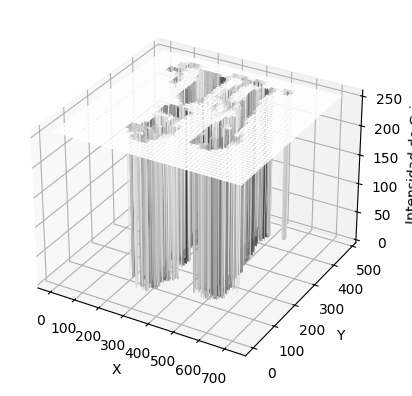

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def mostrar_imagen_3d(ruta_imagen):
    # Cargar la imagen en escala de grises
    imagen_gris = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
        
    # Obtener el tamaño de la imagen
    filas, columnas = imagen_gris.shape
    
    # Crear los ejes X e Y
    x = np.arange(0, columnas, 1)
    y = np.arange(0, filas, 1)
    x, y = np.meshgrid(x, y)
    
    # Intensidad de los píxeles en Z
    z = imagen_gris
    
    # Crear la figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Graficar la superficie
    ax.plot_surface(x, y, z, cmap='gray', edgecolor='none')
    
    # Etiquetas de los ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensidad de Gris')
    
    # Mostrar la gráfica
    plt.show()


ruta_imagen = r"C:\Users\Mack\Documents\Archivos JP\Master\Q32024\TExtM\Lab1\Lab2\imagen_binarizada.jpg"
mostrar_imagen_3d(ruta_imagen)


# Transformaciones


In [ ]:
# Lineal
def transformacion_lineal(imagen, alfa=1, beta=0):
    return np.clip(a*imagen+b,0,255).astype(np.uint8)

In [ ]:
#Logaritmica
def transformacion_log(imagen,c=1):
    return c* np.log1p(imagen).astype(np.uint8)

In [ ]:
#Negativa
def transformacion_negativa(imagen_gris):
    return 255 - imagen_gris


In [ ]:
#exponencial
def transformacion_exp(imagen, c=1,gamma=1):
    return np.clip(c* np.power(imagen/255.0,gamma)*255,0,255).astype(np.uint8)

# Problema 5

## kernel laplaciano vs algoritmo de Canny

- El fernel o filtro laplaciano es un filtro especializado en la deteccion de bordes el cual se basa en las derivadas de segundo orden de una imagen. Utiliza un solo kernerl de 3x3 o 5x5 que se convuelve con la imagen, generando asi un a nueva imagen.
- El filtro de Canny es mas sofistica y argumentablemente mas utilizado para la detección de bordes, consta de cuatro pasos principales:
    - Suavizado,
    - Cálculo de gradiente, 
    - Supresión no máxima,
    - Umbral de histéresis,
    
Las ventajas del filtro Canny son que produce bordes delgados, suaves y precisos, y que se adapta a diferentes características de imagen mediante el uso de parámetros ajustables. 